                                            IMPORTING TH REQUIRED LIBRARIES


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns 

In [2]:
print(tf.__version__)

2.18.0


In [3]:
train_dir = "Fer2013/train" 
test_dir = "Fer2013/test"  

                                    Image Data Augmentation for Training and Validation

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    width_shift_range = 0.08,       
    height_shift_range = 0.08,      
    horizontal_flip = True,   
    zoom_range=0.15,
    rotation_range=15,
    shear_range=0.1,
    brightness_range=[0.7, 1.3],       
    rescale = 1./255,              
    validation_split = 0.2        
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,              
    validation_split = 0.2         
)

                                           Creating Data Generators for Training and Validation

In [5]:

train_generator = train_datagen.flow_from_directory(
    directory = train_dir,          
    target_size = (48, 48),         
    batch_size = 64,               
    color_mode = "grayscale",      
    class_mode = "categorical",     
    subset = "training"             
)

validation_generator = validation_datagen.flow_from_directory(
    directory = test_dir,           
    target_size = (48, 48),          
    batch_size = 64,                
    color_mode = "grayscale",        
    class_mode = "categorical",      
    subset = "validation"           
)

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [6]:
print(train_generator.class_indices)
print(validation_generator.class_indices)

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


                               Building a CNN Model for Facial Expression Recognition

In [8]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import AdamW


model = Sequential()


model.add(Conv2D(128, kernel_size=(5,5), activation='relu', input_shape=(48,48,1)))

model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))

model.add(BatchNormalization())



model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.2))



model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))

model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))

model.add(BatchNormalization())



model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))



model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))

model.add(BatchNormalization())

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))

model.add(BatchNormalization())



model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))



model.add(Flatten())


model.add(Dense(256, activation='relu'))

model.add(BatchNormalization())

model.add(Dropout(0.2))


model.add(Dense(256, activation='relu'))  

model.add(BatchNormalization())

model.add(Dropout(0.2)) 



model.add(Dense(7, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.AdamW(learning_rate=0.0001), metrics=['accuracy'])

                                                     ModelCheckpoint Callback

In [9]:

from tensorflow.keras.callbacks import ModelCheckpoint

# Define the callback
checkpoint_callback = ModelCheckpoint(filepath='model.weights.h5',
                                      monitor='val_accuracy', 
                                      save_best_only=True, 
                                      save_weights_only=True, 
                                      mode='max', 
                                      verbose=1)

                                          Model Training

In [10]:
#from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

#early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=60,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint_callback, lr_scheduler]
)

c:\Users\Mahavishnu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1767 - loss: 2.4850
Epoch 1: val_accuracy improved from -inf to 0.22416, saving model to model.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 400s 1s/step - accuracy: 0.1767 - loss: 2.4846 - val_accuracy: 0.2242 - val_loss: 1.9039 - learning_rate: 1.0000e-04
Epoch 2/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 945ms/step - accuracy: 0.2409 - loss: 2.0785
Epoch 2: val_accuracy improved from 0.22416 to 0.34288, saving model to model.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 344s 957ms/step - accuracy: 0.2409 - loss: 2.0783 - val_accuracy: 0.3429 - val_loss: 1.7043 - learning_rate: 1.0000e-04
Epoch 3/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 797ms/step - accuracy: 0.2882 - loss: 1.9231
Epoch 3: val_accuracy improved from 0.34288 to 0.39106, saving model to model.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 291s 810ms/step - accuracy: 0.2882 - loss: 1.9231 - val_accuracy: 0.3911 - val_loss: 1.5747 - learning_rate: 1.0000e-04
Epoch 4/60
359/359 ━━━━━━━━━━━━

                                            Model Evaluation & Saving

In [12]:

test_loss, test_acc = model.evaluate(validation_generator)   
print(f"Test Accuracy: {test_acc * 100:.2f}%")


model.save("emotion_detection_model.h5")

23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step - accuracy: 0.6893 - loss: 0.9012


Test Accuracy: 69.27%


                                           Plotting Training & Validation Loss

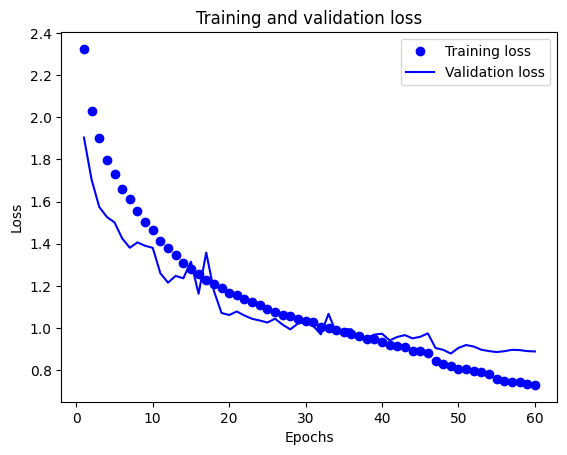

In [13]:

#Plot the train and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() 
plt.show()

                                            Plotting Training & Validation Accuracy 

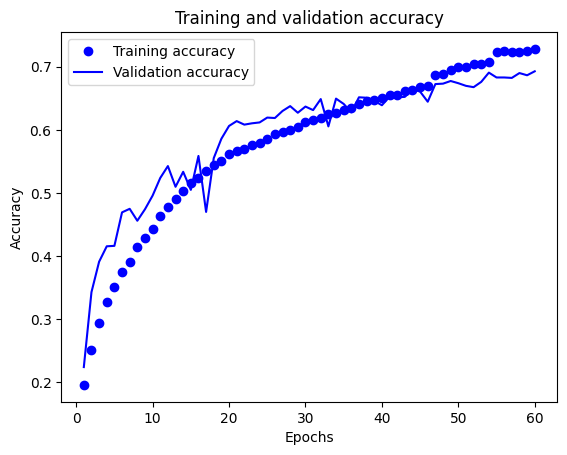

In [15]:

# Plot the train and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


                                              Confusion Matrix for Emotion Detection Model

23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 315ms/step


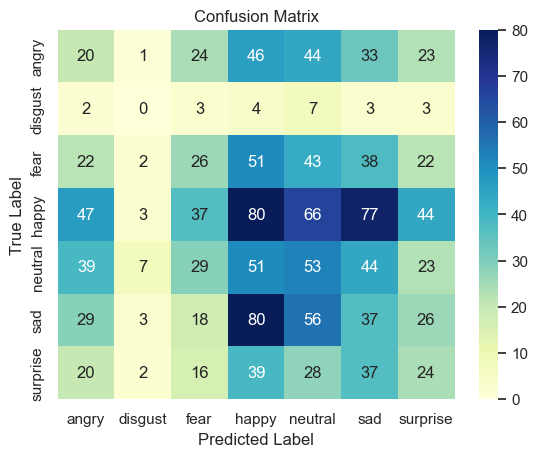

In [16]:

import seaborn as sns 
from sklearn.metrics import confusion_matrix

# Get the true labels and predicted labels for the validation set
validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_generator.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

1. neutral
2. sad
3. happy
4. surprise
5. angry   

# Overall steps


1.Importing the required libraries/modules

2.collect and prepare the dataset 

3.build the model

4.Train the model

5.Evaluate the model

# Real time prediction _ steps

1. Importing the required libraries/modules

2. Loading the trained model

3. Defining emotion categories

4. Intializing Face Detection

5. Capturing the video From the webcam

6. processing the video frames in a loop

7. Converting frame to gayscale

8. Detecting the  face in the frame

9. Processing each detected face

10. Preparing face image for prediction 

11. Making the emotion predictions

12. Displaying the results

13. stoppping the program 

14. Releasing resources